#Gaussians

Formula:

> $p(x) = \dfrac{1}{\sqrt{2\pi\sigma^2}} e^{-(x-\mu)^2/2\sigma^2}$

where,

* $\mu$: mean
* $\sigma^2$: varience

For uncertain, continuous quantities, such as the estimated location of a self-driving car, we use **Gaussians to represent uncertainty** in that quantity. The smaller the variance, the more certain we are about a quantity.

In [ ]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0*pi*sigma2)
    exponential = exp(-((x - mu)**2)/(2.0*sigma2))
    return coefficient*exponential

In [ ]:
g = f(10, 4, 8)
print(g)

0.12098536225957168


## Plotting a Gaussian

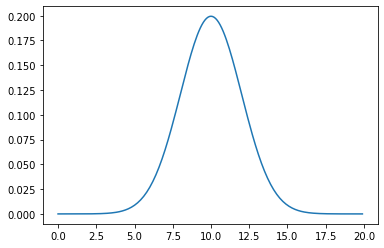

In [ ]:
mu = 10
sigma2 = 4

x_axis = np.arange(0, 20, 0.1)
g = [f(mu, sigma2, x) for x in x_axis]
plt.plot(x_axis, g)

In [ ]:
# maximize a Gaussian by setting mu and x equal
gauss_2 = f(10, 4, 10)
print(gauss_2)

0.19947114020071635


# New mean and variance

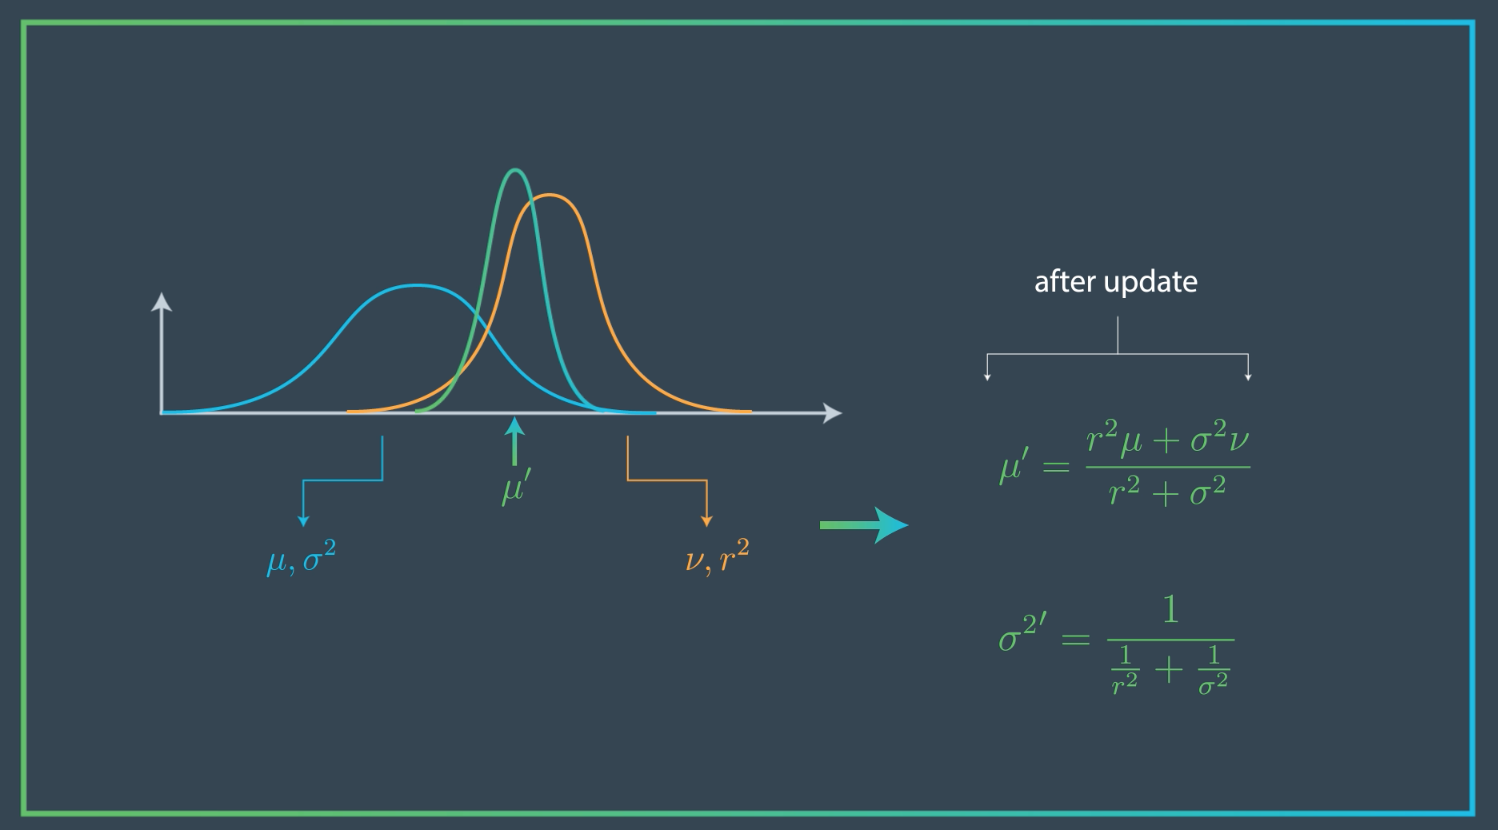

In [ ]:
def update(mean1, var1, mean2, var2):
    new_mean = (mean1*var2 + mean2*var1) / (var2 + var1)
    new_var = 1/(1/var2 + 1/var1)

    return [new_mean, new_var]

In [ ]:
new_params = update(10, 4, 12, 4)
print(new_params)

[11.0, 2.0]


## Plotting a Gaussian

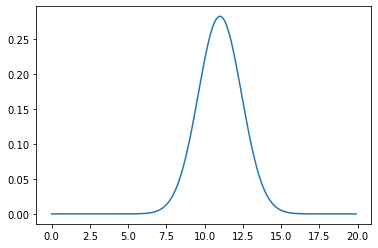

In [ ]:
mu = new_params[0]
sigma2 = new_params[1]

x_axis = np.arange(0, 20, 0.1)
g = [f(mu, sigma2, x) for x in x_axis]
plt.plot(x_axis, g)

# Motion update

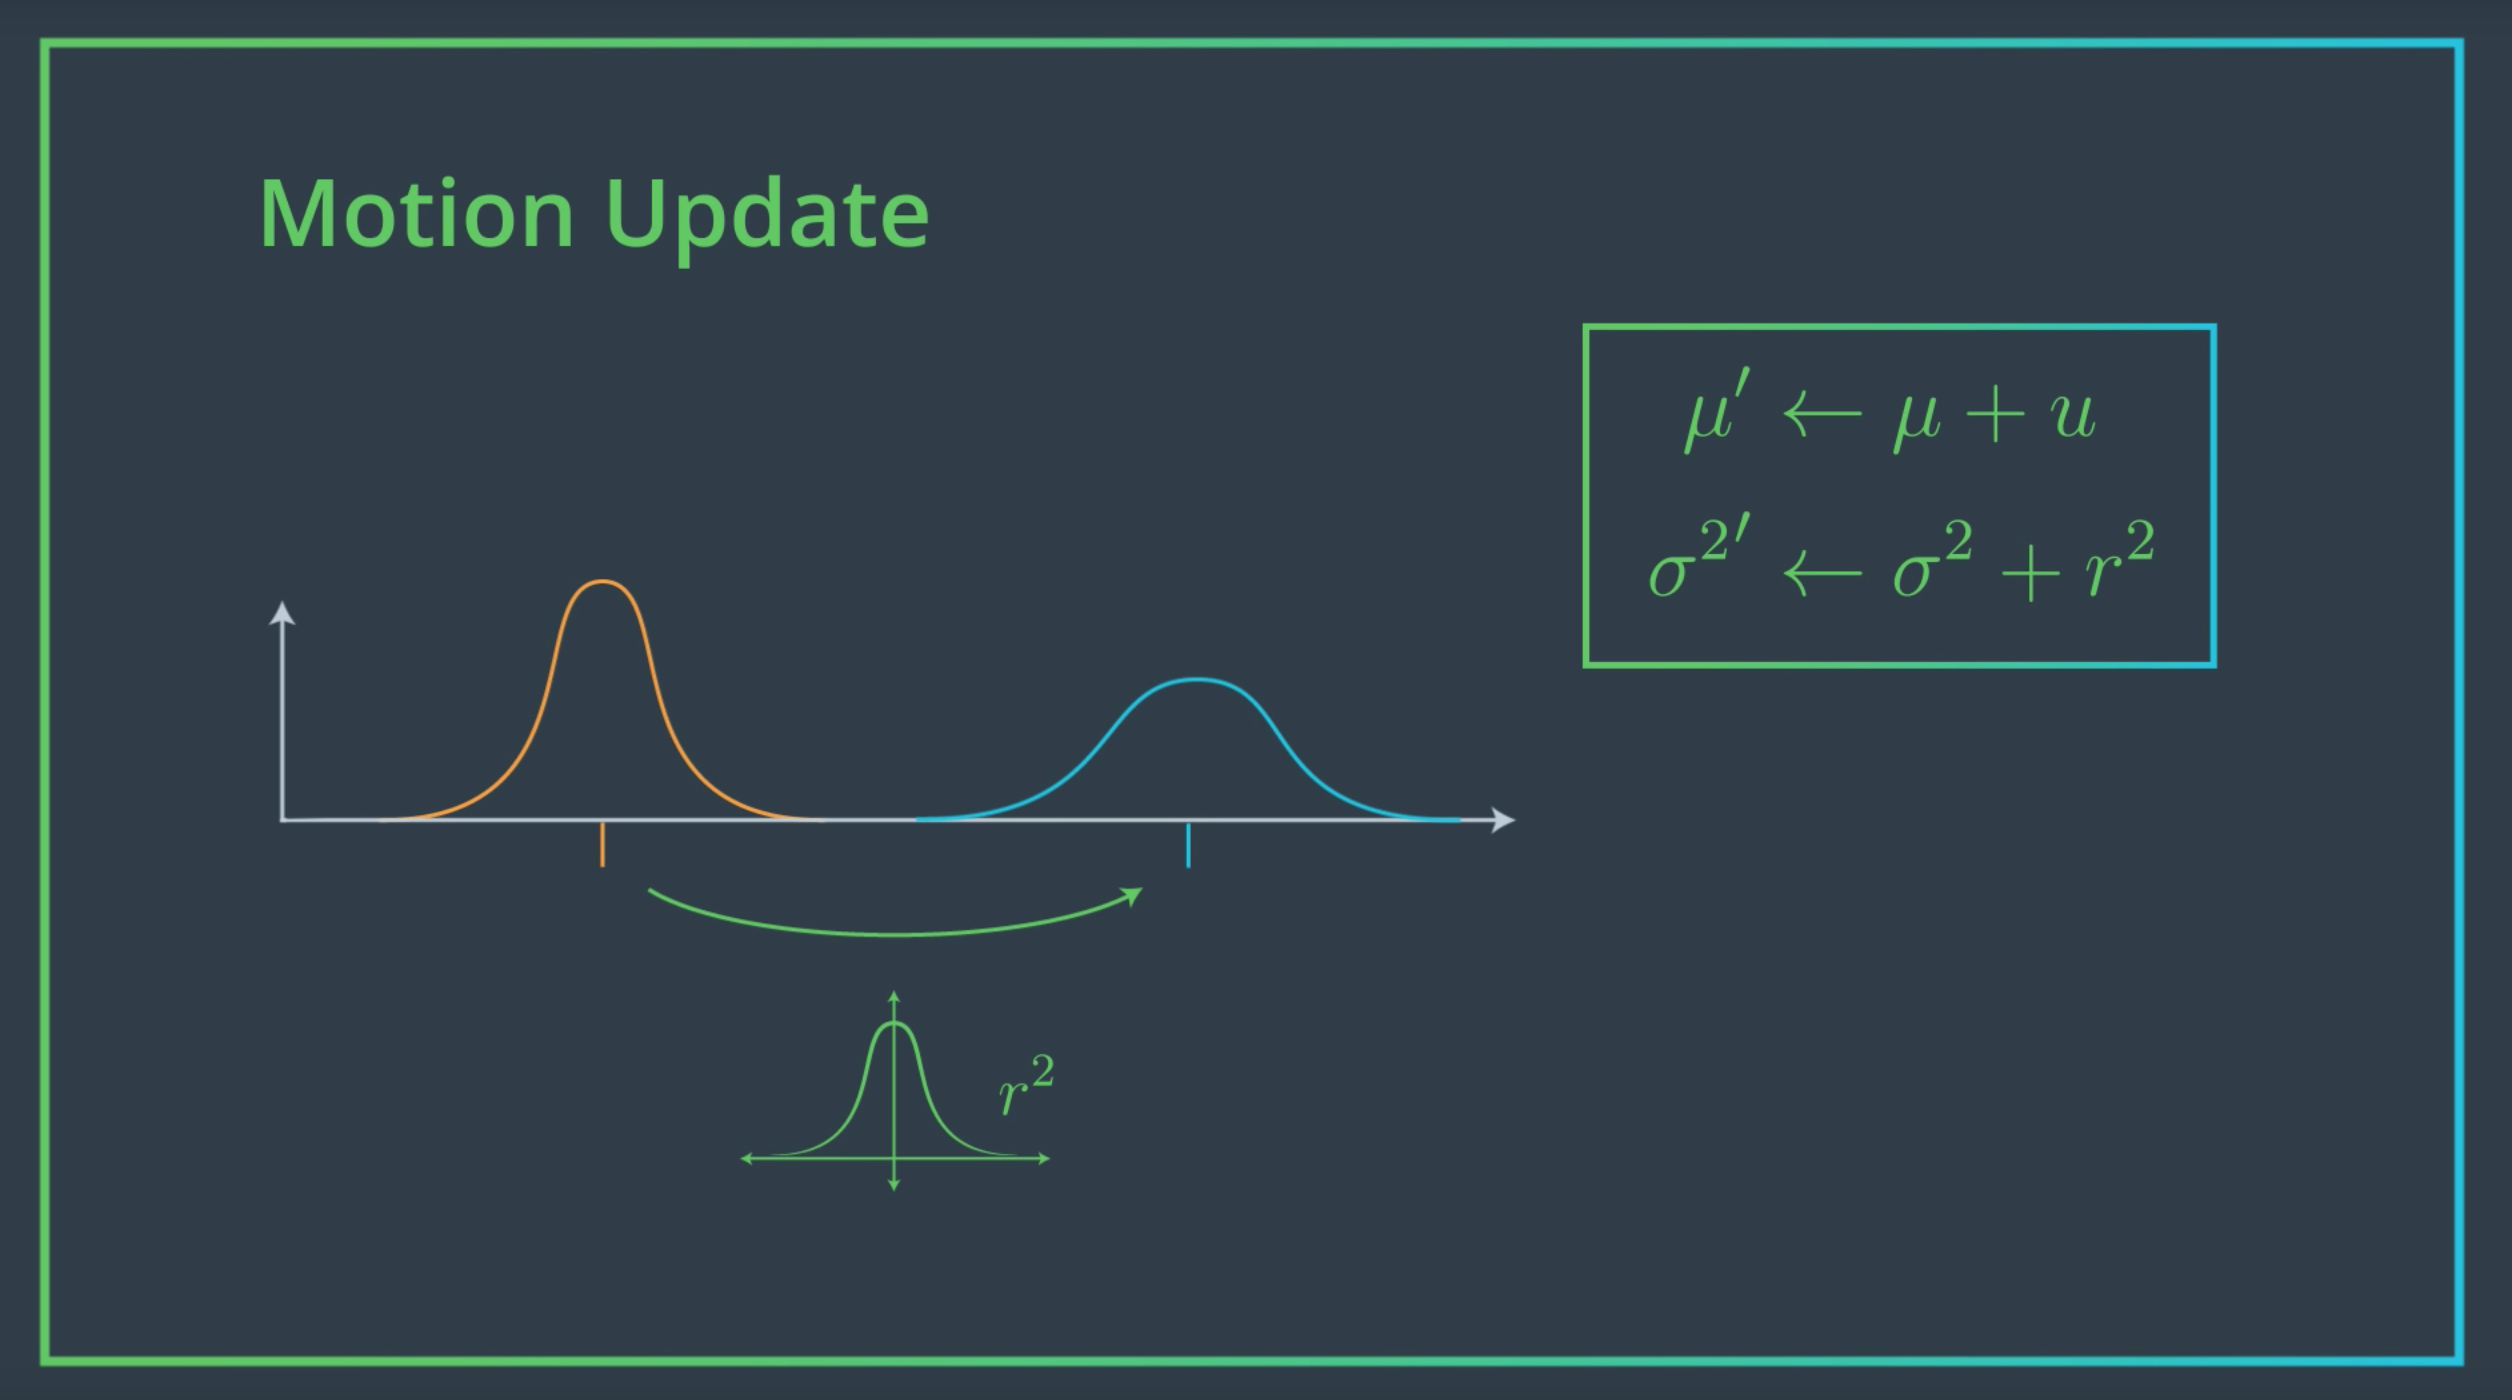

In [19]:
def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]

In [20]:
new_params = predict(10, 4, 12, 4)
print(new_params)

[22, 8]


## Plotting a Gaussian

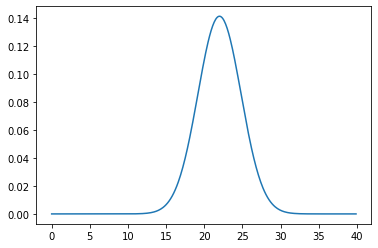

In [21]:
mu = new_params[0]
sigma2 = new_params[1]
x_axis = np.arange(0, 40, 0.1)
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))
plt.plot(x_axis, g)

# 1-D Kalman filter

Let's take the case of a robot that moves through the world. As a robot moves through the world it locates itself by performing a cycle of:
1. sensing and performing a measurement update
2. moving and performing a motion update

In [46]:
# measurements for mu and motions, U
measurements = [5, 6, 7, 9, 10]
motions = [1, 1, 2, 1, 1]

# inital parameters
measurement_sig = 4
motion_sig = 2
mu = 0
sig = 10000

In [47]:
print("\t     new mean\t        new variance")
for i in range(len(measurements)):
    mu, sig = update(mu, sig, measurements[i], measurement_sig)
    print("update:  [{}, {}]".format(mu, sig))
    mu, sig = predict(mu, sig, motions[i], motion_sig)
    print('predict: [{}, {}]'.format(mu, sig))

print("\t          new mean\t       new variance")
print('final result: [{}, {}]'.format(mu, sig))

	     new mean	        new variance
update:  [4.998000799680128, 3.9984006397441023]
predict: [5.998000799680128, 5.998400639744102]
update:  [5.999200191953932, 2.399744061425258]
predict: [6.999200191953932, 4.399744061425258]
update:  [6.999619127420922, 2.0951800575117594]
predict: [8.999619127420921, 4.09518005751176]
update:  [8.999811802788143, 2.0235152416216957]
predict: [9.999811802788143, 4.023515241621696]
update:  [9.999906177177365, 2.0058615808441944]
predict: [10.999906177177365, 4.005861580844194]
	          new mean	       new variance
final result: [10.999906177177365, 4.005861580844194]


## Plotting a Gaussian

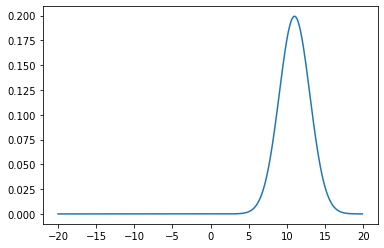

In [49]:
# plotting a final gaussian

mu = mu
sigma2 = sig
x_axis = np.arange(-20, 20, 0.1)
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))
plt.plot(x_axis, g)

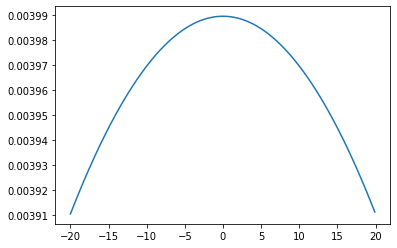

In [50]:
# plotting inital gaussian

mu = 0
sigma2 = 10000
x_axis = np.arange(-20, 20, 0.1)
g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))
plt.plot(x_axis, g)